In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
folder_path = "/content/drive/MyDrive/ZeoTap/"

In [53]:
customers = pd.read_csv(folder_path + "Customers.csv")
products = pd.read_csv(folder_path + "Products.csv")
transactions = pd.read_csv(folder_path + "Transactions.csv")

In [54]:
customers.shape

(200, 4)

In [55]:
transactions.shape

(1000, 7)

In [56]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [57]:
customers.isnull().sum()


,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [58]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [59]:
#combining data of transaction and customers
transactions = pd.merge(transactions, products, on='ProductID')

In [60]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [61]:
transactions.shape

(1000, 10)

In [62]:
df = transactions.drop(columns=["TransactionID", "TransactionDate", "ProductName", "Category", "Price_y"])

In [63]:
df_grouped = df.groupby("CustomerID").agg({"Quantity": "sum", "TotalValue": "sum"}).reset_index()

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped[["Quantity", "TotalValue"]])

In [66]:
inertia = []
k_values = range(2, 10)

In [68]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

ValueError: x and y must have same first dimension, but have shapes (8,) and (16,)

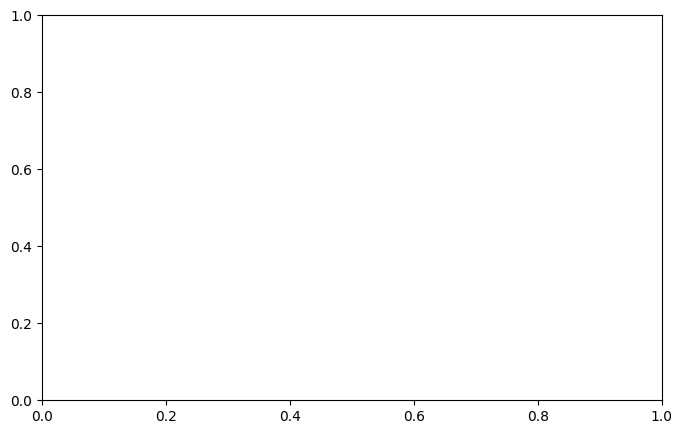

In [69]:
# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [70]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_grouped["Cluster"] = kmeans.fit_predict(scaled_data)

In [71]:
from sklearn.metrics import davies_bouldin_score

In [72]:
db_index = davies_bouldin_score(scaled_data, df_grouped["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.3f}")

Davies-Bouldin Index: 0.702


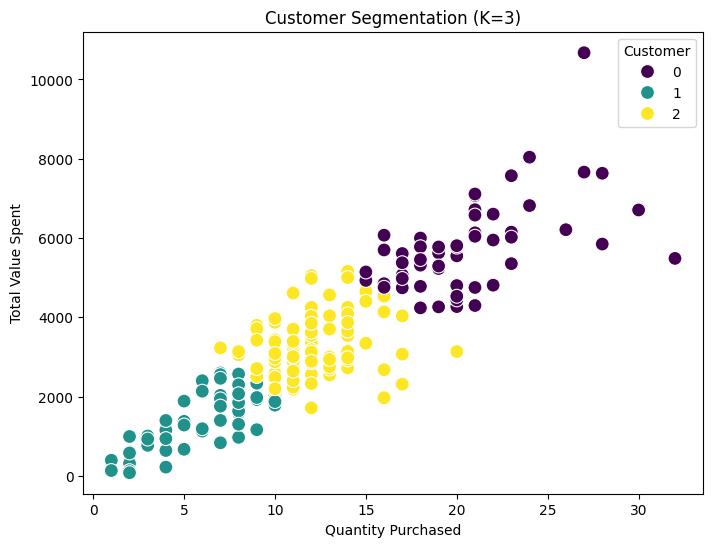

In [75]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_grouped["Quantity"], y=df_grouped["TotalValue"], hue=df_grouped["Cluster"], palette="viridis", s=100)
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Value Spent")
plt.title(f"Customer Segmentation (K={optimal_k})")
plt.legend(title="Customer")
plt.show()

In [77]:
cluster_counts = df_grouped['Cluster'].value_counts()
print("Number of customers in each cluster:\n", cluster_counts)


Number of customers in each cluster:
 Cluster
2    89
1    55
0    55
Name: count, dtype: int64
